# 디리클레 분포

디리클레 분포(Dirichlet distribution)는 베타 분포의 확장판이라고 할 수 있다. 베타 분포는 0과 1사이의 값을 가지는 단일(univariate) 확률 변수의 베이지안 모형에 사용되고 디리클레 분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률 변수의 베이지안 모형에 사용된다. 다만 디리클레 분포틑 다변수 확률 변수들의 합이 1이되어야 한다는 제한 조건을 가진다.

즉 $K=3$인 디리클레 분포를 따르는 확률 변수는 다음과 같은 값들을 샘플로 가질 수 있다.

$$(1, 0, 0)$$
$$(0.5, 0.5, 0)$$
$$(0.2, 0.3, 0.5)$$

디리클레 분포의 확률 밀도 함수는 다음과 같다.

$$ f(x_1, x_2, \cdots, x_K) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{i=1}^K x_i^{\alpha_i - 1} $$
여기에서 
$$ \mathrm{B}(\boldsymbol\alpha) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)} {\Gamma\bigl(\sum_{i=1}^K \alpha_i\bigr)} $$
이고 다음과 같은 제한 조건이 있다.
$$  \sum_{i=1}^{K} x_i = 1 $$

이 식에서 $\boldsymbol\alpha =  (\alpha_1, \alpha_2, \ldots, \alpha_K)$는 디리클레 분포의 모수 벡터이다.

## 베타 분포와 디리클레 분포의 관계

베타 분포는 $K=2$ 인 디리클레 분포라고 볼 수 있다.

즉 $x_1 = x$, $x_2 = 1 - x$, $\alpha_1 = a$, $\alpha_2 = b$ 로 하면 

$$ 
\begin{eqnarray}
\text{Beta}(x;a,b) 
&=& \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} \\
&=& \frac{\Gamma(\alpha_1+\alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)}\,  x_1^{\alpha_1 - 1} x_2^{\alpha_2 - 1} \\
&=& \frac{1}{\mathrm{B}(\alpha_1, \alpha_2)} \prod_{i=1}^2 x_i^{\alpha_i - 1}
\end{eqnarray}
$$



## 디리클레 분포의 모멘트 특성

디리클레 분포의 기댓값, 모드, 분산은 다음과 같다.

* 기댓값
$$E[x_k] = \dfrac{\alpha_k}{\alpha}$$
여기에서
$$\alpha=\sum\alpha_k$$

* 모드
$$ \dfrac{\alpha_k - 1}{\alpha - K}$$

* 분산
$$\text{Var}[x_k] =\dfrac{\alpha_k(\alpha - \alpha_k)}{\alpha^2(\alpha + 1)}$$

기댓값 공식을 보면 모수인 $\boldsymbol\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_K)$는 $(x_1, x_2, \ldots, x_K$ 중 어느 수가 더 크게 나올 가능성이 높은지를 결정하는 형상 인자(shape factor)임을 알 수 있다. 모든 $\alpha_i$값이 동일하면 모든 $x_i$의 분포가 같아진다. 

또한 분산 공식을 보면 $\boldsymbol\alpha$의 절대값이 클수록 분산이 작아진다. 즉, 어떤 특정한 값이 나올 가능성이 높아진다.

## 디리클레 분포의 응용

다음과 같은 문제를 보자 이 문제는 $K=3$이고 $ \alpha_1 = \alpha_2 = \alpha_3$ 인 Dirichlet 분포의 특수한 경우이다.

<img src="https://datascienceschool.net/upfiles/d0acaf490aaa41389b975e20c58ac1ee.png" style="width:90%; margin: 0 auto 0 auto;">

3차원 디리클레 문제는 다음 그림과 같이 3차원 공간 상에서 (1,0,0), (0,1,0), (0,0,1) 세 점을 연결하는 정삼각형 면위의 점을 생성하는 문제라고 볼 수 있다.

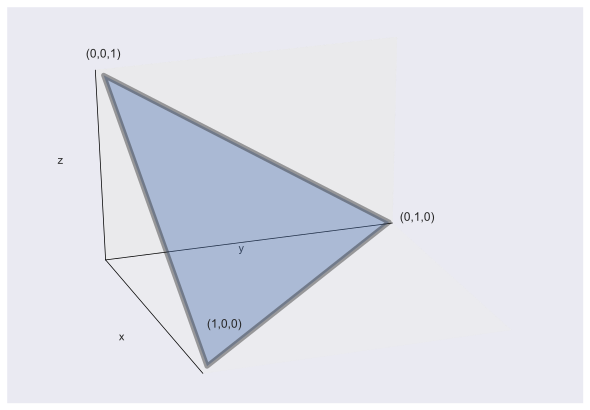

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)
x = [1,0,0]
y = [0,1,0]
z = [0,0,1]
verts = [zip(x, y,z)]
ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=5, alpha=0.4))
ax.text(1, 0, 0, "(1,0,0)", position=(0.7,0.1))
ax.text(0, 1, 0, "(0,1,0)", position=(0,1.04))
ax.text(0, 0, 1, "(0,0,1)", position=(-0.2,0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES 
# set origin ( http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib )
ax.yaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                    tmp_planes[0], tmp_planes[1], 
                    tmp_planes[4], tmp_planes[5])
ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                    tmp_planes[0], tmp_planes[1], 
                    tmp_planes[4], tmp_planes[5])
plt.show()

다음 함수는 생성된 점들을 2차원 삼각형 위에서 볼 수 있도록 그려주는 함수이다.

In [14]:
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2)/2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)

    X1 = (X-n12).dot(m1)
    X2 = (X-n12).dot(m2)
    
    g = sns.jointplot(X1, X2, kind=kind, xlim=(-0.8,0.8), ylim=(-0.45,0.9))
    g.ax_joint.axis("equal")
    plt.show()

만약 이 문제를 단순하게 생각하여 서로 독립인 0과 1사이의 유니폼 확률 변수를 3개 생성하고 이들의 합이 1이 되도록 크기를 정규화(normalize)하면 다음 그림과 같이 삼각형의 중앙 근처에 많은 확률 분포가 집중된다. 즉, 확률 변수가 골고루 분포되지 않는다.

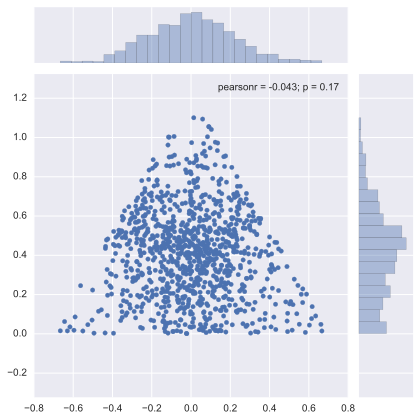

In [15]:
X1 = np.random.rand(1000, 3)
X1 = X1/X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

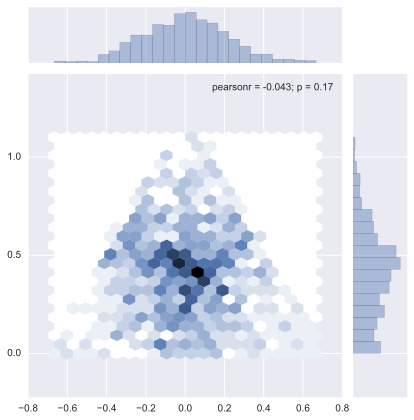

In [16]:
plot_triangle(X1, kind="hex")

그러나 $\alpha=(1,1,1)$인 디리클레 분포는 다음과 같이 골고루 샘플을 생성한다.

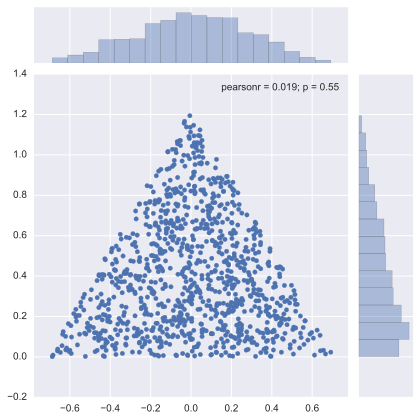

In [17]:
X2 = sp.stats.dirichlet((1,1,1)).rvs(1000)
plot_triangle(X2, kind="scatter")

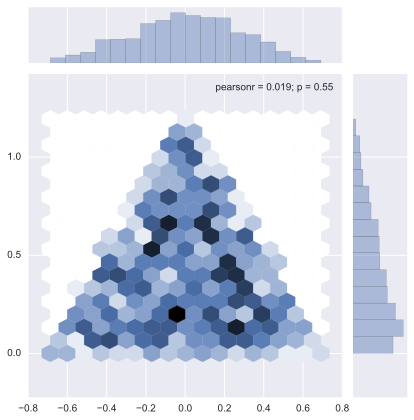

In [18]:
plot_triangle(X2, kind="hex")

$\alpha$가 $(1,1,1)$이 아닌 경우에는 다음과 같이 특정 위치에 분포가 집중되도록 할 수 있다. 이 특성을 이용하면 다항 분포의 모수를 추정하는 베이지안 추정 문제에 응용할 수 있다.

In [19]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2)/2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2)/2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return x[:,0][:, np.newaxis] * m1 + x[:,1][:, np.newaxis] * m2 + n12

eps = np.finfo(float).eps * 10
X = project([[1-eps,0,0], [0,1-eps,0], [0,0,1-eps]])

In [20]:
import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:,0], X[:,1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

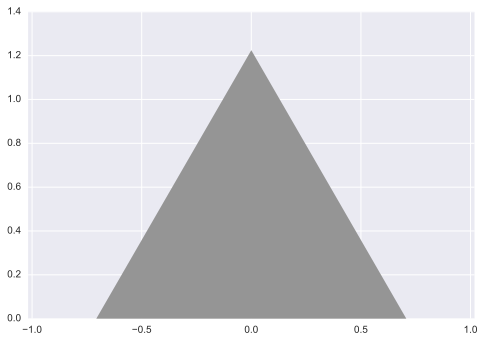

In [21]:
pdf = sp.stats.dirichlet((1,1,1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

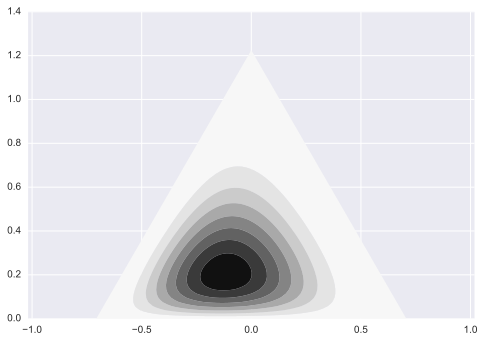

In [22]:
pdf = sp.stats.dirichlet((3,4,2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

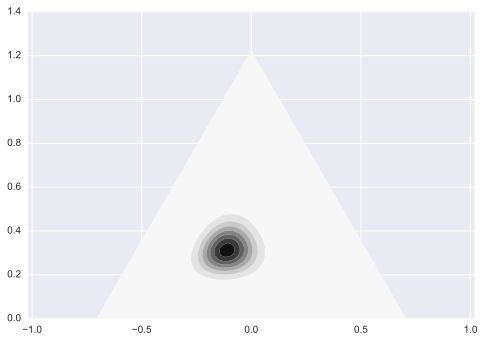

In [23]:
pdf = sp.stats.dirichlet((16,24,14)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()